## Pointing error CORALIE analysis

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
import datetime
import pandas as pd
import csv

In [2]:
# Load the CSV file
output_csv_path = "/home/alberte2/Sample_docs/pointing information Coralie.csv"
df = pd.read_csv(output_csv_path)

# Retrieve and convert the data back to the original format
Star_coords_real = [eval(coord) for coord in df['Star_coords_real']]  # Convert string back to tuple
Fiber_pix_coords = [eval(coord) for coord in df['Fiber_pix_coords']]  # Convert string back to tuple
Star_centroid_pix_coords = [eval(coord) for coord in df['Star_centroid_pix_coords']]  # Convert string back to tuple
observation_dates = df['Observation_dates'].tolist()

In [3]:
#function that calculates the pointing error
def pixel_to_azi_ele(coords):
    """
    Converts an array of pixel coordinates to azimuth and elevation.

    Parameters:
    -----------
    coords : list of tuples representing the pixel distance of target from the fiber hole. So a distance of (0,0) corresponds to a perfect alignment of the target and hole.
        List of pixel coordinates [(px_x, px_y), (px2, py2), ...].

    Returns:
    --------
    results : list of tuples
        List of (delta_azimuth, delta_elevation) values in arcseconds for each input coordinate.
    """

    te_scale = 0.02702  # mm/s

    d_xpixel = 0.00645  # Size of pixel in mm
    d_ypixel = 0.00645  # Size of pixel in mm

    d_xscale = 0.2575  # arcseconds per pixel in x
    d_yscale = 0.2575  # arcseconds per pixel in y

    d_xscazin = -0.17452406e-01  # ≈ -sin(1 degree)
    d_yscazin = 0.99984771       # ≈ cos(1 degree)
    d_xscelen = 0.99984771      # ≈ -cos(1 degree)  #corrected sign from Bruno's code
    #d_xscelen = -0.99984771      # ≈ -cos(1 degree)
    d_yscelen = -0.17452406e-01  # ≈ -sin(1 degree)

    d_xscazi = d_xscazin * d_xscale
    d_yscazi = d_yscazin * d_yscale
    d_xscele = d_xscelen * d_xscale
    d_yscele = d_yscelen * d_yscale

    results = []
    for px_x, px_y in coords:
        # Calculate azimuth and elevation for each (px_x, px_y) coordinate
        ce_argazi = (px_x * d_xscazi + px_y * d_yscazi)
        ce_argele = (px_x * d_xscele + px_y * d_yscele)

        # Append the results as a tuple (azimuth, elevation)
        results.append((ce_argazi, ce_argele))

    return results

In [4]:
# Step 1: Compute the difference in pixel coordinates for each pair
pixel_differences = [(star_x - fiber_x, star_y - fiber_y) for (fiber_x, fiber_y), (star_x, star_y) in zip(Fiber_pix_coords, Star_centroid_pix_coords)]

# Step 2: Convert the pixel differences to azimuth and elevation errors using pixel_to_azi_ele
pointing_error_alt_az = pixel_to_azi_ele(pixel_differences)
pointing_error_alt_az_abs = np.abs(pixel_to_azi_ele(pixel_differences))

#print(pointing_error_alt_az)
#print(pointing_error_alt_az_abs)

In [5]:
p = len(Star_centroid_pix_coords)
q = len(Fiber_pix_coords)
print(p, q)
#print(Star_coords_real)

7321 7321


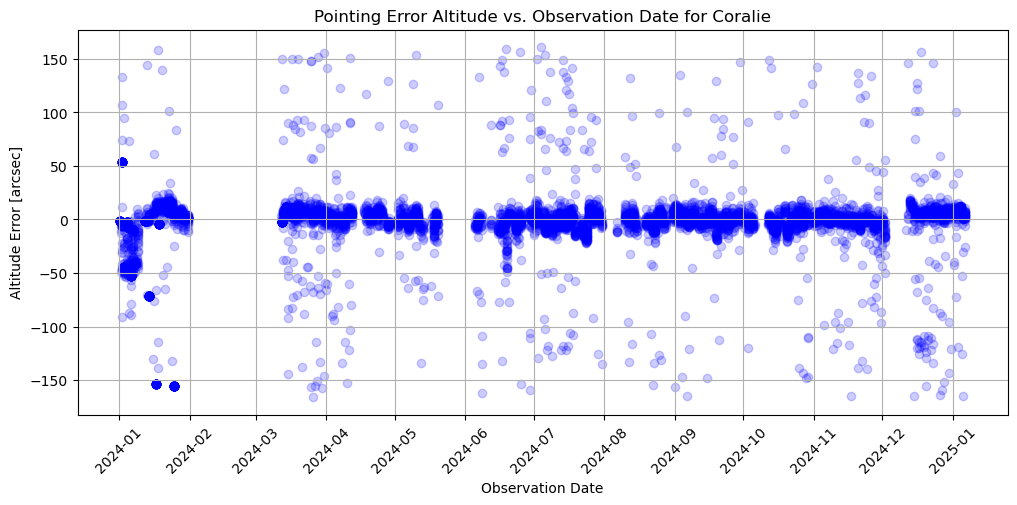

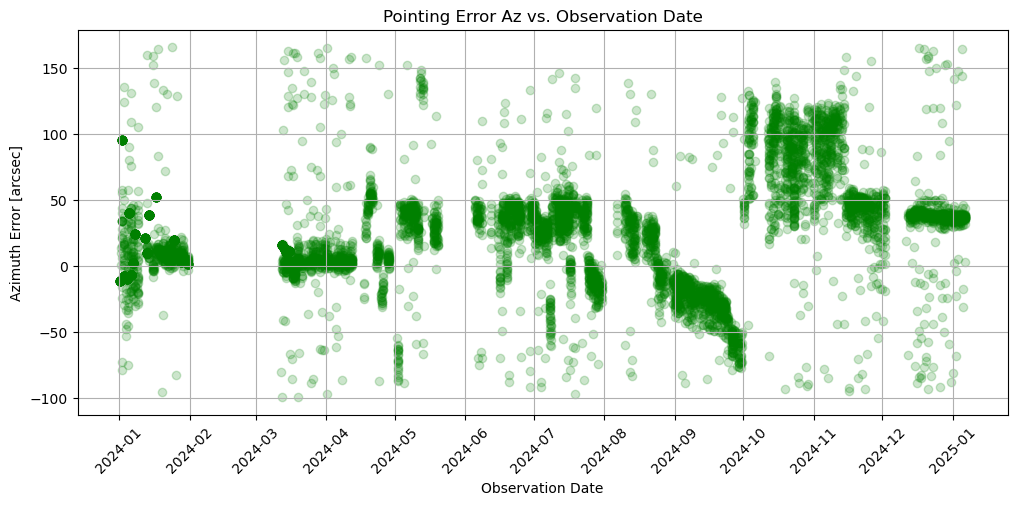

In [8]:
# Convert observation_dates to datetime objects for plotting
observation_Dates = [datetime.datetime.fromisoformat(date) for date in observation_dates]

# Save data in TPOINT-compatible format
#with open("pointing_errors_for_tpoint.dat", "w") as f:
#    f.write("Observation Date, Altitude Error, Cross-Elevation Error\n")
#   for date, alt_err, cross_elev_err in zip(observation_dates, alt_errors, cross_elev_errors):
#       f.write(f"{date.strftime('%Y-%m-%dT%H:%M:%S')}, {alt_err:.2f}, {cross_elev_err:.2f}\n")

az_errors = [az_error for az_error, alt_error in pointing_error_alt_az]
az_errors = np.array(az_errors, dtype=float)
alts_real = np.array([alt_real for az_real, alt_real in Star_coords_real], dtype=float)
#az_errors = az_errors*np.cos(np.radians(alts_real))
alt_errors = [alt_error for az_error, alt_error in pointing_error_alt_az]

#print("Errors in az: ", az_errors)
#print("---------------------------------------------------------------------------")
#print("Errors in alt: ", alt_errors)

# Plotting Azimuth Error vs. Date
plt.figure(figsize=(12, 5))
plt.scatter(observation_Dates, alt_errors, color='blue', alpha = 0.2, label="Altitude Error [arcsec]")
plt.xlabel("Observation Date")
plt.ylabel("Altitude Error [arcsec]")
#plt.ylim(-50, 50)
plt.title("Pointing Error Altitude vs. Observation Date for Coralie")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
plt.grid()
#plt.ylim(0, max(alt_errors) * 1.1)
plt.show()

# Plotting Cross-Elevation Error vs. Date
plt.figure(figsize=(12, 5))
plt.scatter(observation_Dates, az_errors, color='green', alpha = 0.2, label="Azimuth Error [arcsec]")
#plt.xlim(pd.to_datetime('2024-04-01'), pd.to_datetime('2024-06-01'))
plt.xlabel("Observation Date")
plt.ylabel("Azimuth Error [arcsec]")
plt.title("Pointing Error Az vs. Observation Date")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
plt.grid()
#plt.ylim(0, max(cross_elev_errors) * 1.1)
plt.show()

/tmp/ipykernel_15355/4183336647.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(cbar_labels)


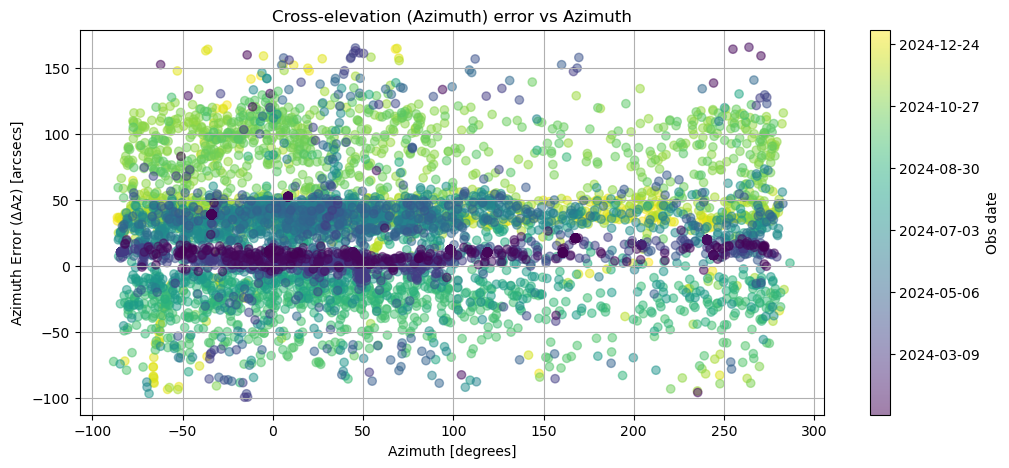

/tmp/ipykernel_15355/4183336647.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(cbar_labels)


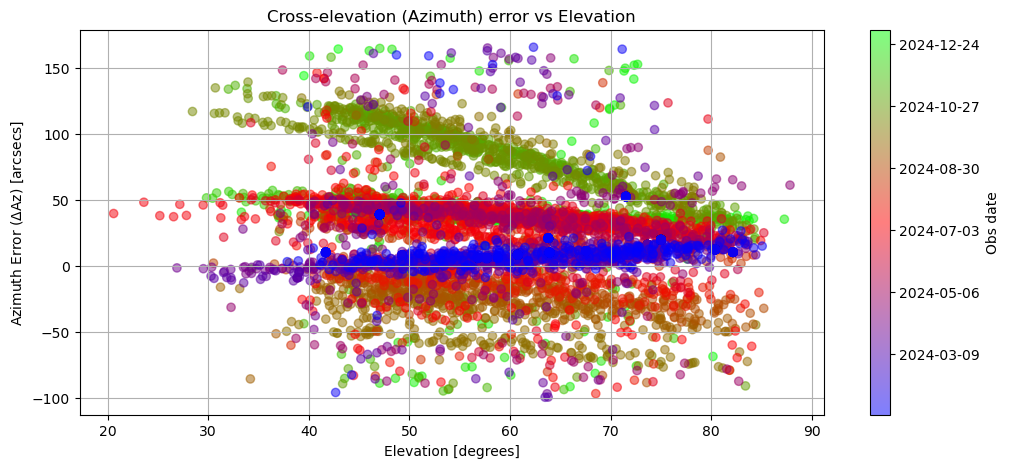

/tmp/ipykernel_15355/4183336647.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(cbar_labels)


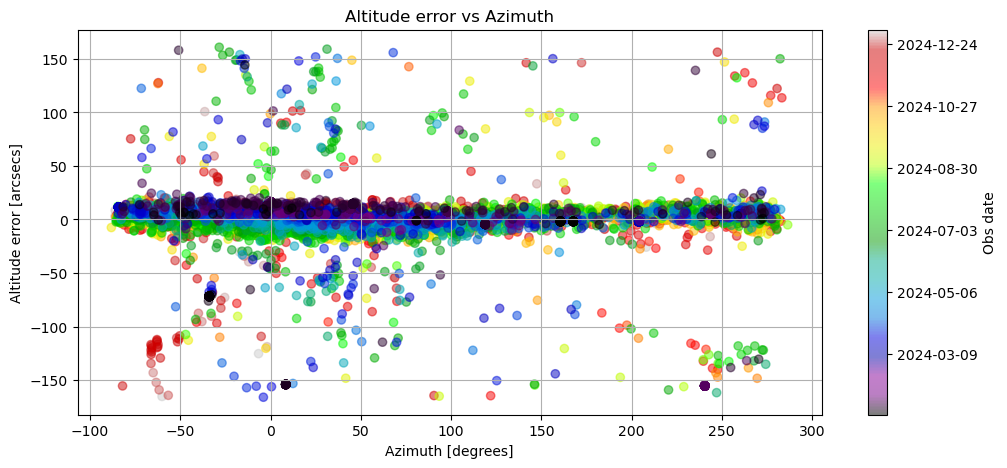

/tmp/ipykernel_15355/4183336647.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(cbar_labels)


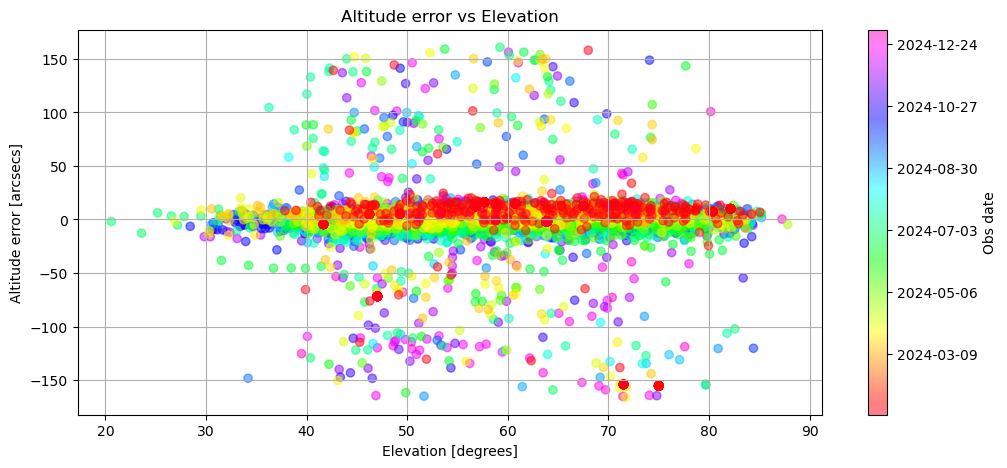

In [9]:
azs_real = np.array([az_real for az_real, alt_real in Star_coords_real], dtype=float)

# Helper function to update the colorbar with date labels
def update_colorbar_with_dates(cbar, observation_dates):
    # Convert the Unix timestamps to formatted dates (year-month-day)
    cbar_ticks = cbar.get_ticks()
    cbar_labels = [pd.to_datetime(t, unit='s').strftime('%Y-%m-%d') for t in cbar_ticks]
    cbar.set_ticklabels(cbar_labels)

# Plot 1: Azimuth Error vs Real Azimuth
plt.figure(figsize=(12, 5))
scatter = plt.scatter(azs_real, az_errors, c=[t.timestamp() for t in observation_Dates], cmap='viridis', alpha=0.5)
plt.title('Cross-elevation (Azimuth) error vs Azimuth')
plt.xlabel('Azimuth [degrees]')
plt.ylabel(r'Azimuth Error ($\Delta$Az) [arcsecs]')
cbar = plt.colorbar(scatter)
update_colorbar_with_dates(cbar, observation_Dates)  
cbar.set_label("Obs date")
plt.grid()
plt.show()

# Plot 2: Azimuth Error vs Real Elevation
plt.figure(figsize=(12, 5))
scatter = plt.scatter(alts_real, az_errors, c=[t.timestamp() for t in observation_Dates], cmap='brg', alpha=0.5)
plt.title('Cross-elevation (Azimuth) error vs Elevation')
plt.xlabel('Elevation [degrees]')
plt.ylabel(r'Azimuth Error ($\Delta$Az) [arcsecs]')
cbar = plt.colorbar(scatter)
update_colorbar_with_dates(cbar, observation_Dates)
cbar.set_label("Obs date")
plt.grid()
plt.show()

# Plot 3: Altitude Error vs Real Azimuth
plt.figure(figsize=(12, 5))
scatter = plt.scatter(azs_real, alt_errors, c=[t.timestamp() for t in observation_Dates], cmap='nipy_spectral', alpha=0.5)
plt.title('Altitude error vs Azimuth')
plt.xlabel('Azimuth [degrees]')
plt.ylabel('Altitude error [arcsecs]')
cbar = plt.colorbar(scatter)
update_colorbar_with_dates(cbar, observation_Dates)  
cbar.set_label("Obs date")
plt.grid()
plt.show()

# Plot 4: Altitude Error vs Elevation
plt.figure(figsize=(12, 5))
scatter = plt.scatter(alts_real, alt_errors, c=[t.timestamp() for t in observation_Dates], cmap='gist_rainbow', alpha=0.5)
plt.title('Altitude error vs Elevation')
plt.xlabel('Elevation [degrees]')
plt.ylabel('Altitude error [arcsecs]')
cbar = plt.colorbar(scatter)
update_colorbar_with_dates(cbar, observation_Dates)  
cbar.set_label("Obs date")
plt.grid()
plt.show()

Text(0, 0.5, 'Altitude [degrees]')

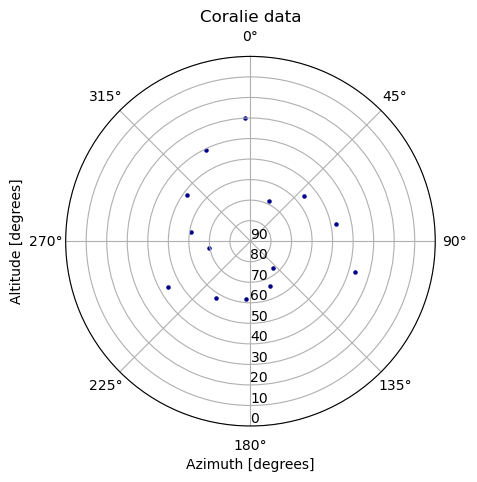

In [8]:
#polar plot for alt and az
# Convert azimuths to radians for the polar plot
azs_real_rad = np.deg2rad(azs_real)

# Create polar plot
plt.figure()
ax = plt.subplot(111, polar=True)
ax.scatter(azs_real_rad, alts_real, color='darkblue', s=5, label='Observation Points')
#set radial limits from 90 to 0
ax.set_rlim(90, 0)

# Customize the plot
ax.set_title("Coralie data")
ax.set_theta_zero_location('N')  # Set 0° azimuth (north) at the top
ax.set_theta_direction(-1)       # Azimuths increase clockwise
ax.set_rlabel_position(180)      # Set radial labels to appear at the left

# Labels and legend
ax.set_xlabel("Azimuth [degrees]")
ax.set_ylabel("Altitude [degrees]", labelpad = 30)
#plt.legend()

In [9]:
#save pointing data to csv file
output_csv = "/home/alberte2/Sample_docs/Pointing errors Coralie short pm.csv"
with open(output_csv, 'w', newline ='') as csvfile:
    writer = csv.writer(csvfile)
    #write header
    writer.writerow(['Observation date', 'Azimuth error [arcsecs]', 'Altitude error [arcsecs]'])
    #write data
    writer.writerows(zip(observation_dates, az_errors, alt_errors))
print(f"Data successfully saved to {output_csv}")

Data successfully saved to /home/alberte2/Sample_docs/Pointing errors Coralie short pm.csv


In [10]:
#Pointing data for tpoint
#at last we may want to check how the pointing model performed after applying the pointing terms. Perhaps tpoint does this already

# List to store data in the required format
tpoint_data = []

# Loop through the real coordinates and pointing errors to calculate actual coordinates
for (az_real, el_real), (delta_cross_ele, delta_alt) in zip(Star_coords_real, pointing_error_alt_az):
    # Calculate actual elevation (altitude)
    if az_real is not None and el_real is not None:
        el_actual = el_real + delta_alt/3600
    
        # Calculate actual azimuth considering the cross-elevation correction
        az_actual = az_real + (delta_cross_ele / (np.cos(np.radians(el_real))*3600))
    
        # Append the data in the order AZ_real, El_real, Az_actual, El_actual
        tpoint_data.append([az_real, el_real, az_actual, el_actual])

# Convert the list to a numpy array for easy saving
tpoint_data = np.array(tpoint_data)

# Save the data to a text file without headers
np.savetxt('/home/alberte2/Sample_docs/tpoint_data_Coralie_short_pm.dat', tpoint_data, fmt='%.6f', delimiter=' ')
print("data saved in specified directory")

data saved in specified directory


## Calculating the pointing corrections

In [11]:
#!/home/weber/anaconda3/bin/python
import astropy.io.fits as pyfits
import numpy as np
import pandas as pd
import pylab as plt
import pathlib
import sys
import argparse
import os
import subprocess

In [12]:
def Pointing_Correction(Azimut_Angle, Elevation_Angle, model):
    """
    Calculation of the pointing correction, code translated from  C
    Beware the azimuth has a 180 degree offset to standard notations
    Angles are in radian at input and in arcsec at the output.

    In the telescope code it is applied in the followin way:
    Azi_final = AZI - Pointing correction azi
    Ele_final = ELE - Pointing correction ele

    pointing corrections are the output of this routine.

    """
    Zenithal_Angle = (np.pi / 2.0) - Elevation_Angle
    COS_Azimut_Angle = np.cos(Azimut_Angle)
    COS_Elevation_Angle = np.cos(Elevation_Angle)
    SIN_Azimut_Angle = np.sin(Azimut_Angle)
    SIN_Elevation_Angle = np.sin(Elevation_Angle)
    TAN_Elevation_Angle = np.tan(Elevation_Angle)
    COS_Zenithal_Angle = np.cos(Zenithal_Angle)
    COS_2_Zenithal_Angle = np.cos(2.0 * Zenithal_Angle)
    COS_4_Zenithal_Angle = np.cos(4.0 * Zenithal_Angle)
    SIN_Zenithal_Angle = np.sin(Zenithal_Angle)
    SIN_2_Zenithal_Angle = np.sin(2.0 * Zenithal_Angle)
    SIN_3_Zenithal_Angle = np.sin(3.0 * Zenithal_Angle)
    SIN_4_Zenithal_Angle = np.sin(4.0 * Zenithal_Angle)
    POW_3_Zenithal_Angle = Zenithal_Angle ** 3
    POW_5_Zenithal_Angle = Zenithal_Angle ** 5

    # Indirects components of the pointing model */
    Delta_CA_Parameter_HSCA_Azimut = (-model["HSCA"]) * COS_Azimut_Angle
    Delta_NPAE_Parameter_HVCA_Azimut = (-model["HVCA"]) * COS_Azimut_Angle
    # Corrections on the azimuth axis */
    Azimut_Delta_ACEC = (-model["ACEC"]) * COS_Azimut_Angle
    Azimut_Delta_ACES = model["ACES"] * SIN_Azimut_Angle
    Azimut_Delta_AN = model["AN"] * (SIN_Azimut_Angle * TAN_Elevation_Angle)
    Azimut_Delta_AW = model["AW"] * (COS_Azimut_Angle * TAN_Elevation_Angle)
    Azimut_Delta_CA = (
                              model["CA"] + Delta_CA_Parameter_HSCA_Azimut
                      ) / COS_Elevation_Angle
    Azimut_Delta_HACA1 = model["HACA1"] * COS_Azimut_Angle
    Azimut_Delta_HSCZ1 = model["HSCZ1"] * (COS_Zenithal_Angle / COS_Elevation_Angle)
    Azimut_Delta_HSCZ2 = model["HSCZ2"] * (COS_2_Zenithal_Angle / COS_Elevation_Angle)
    Azimut_Delta_HSSA1 = model["HSSA1"] * (SIN_Azimut_Angle / COS_Elevation_Angle)
    Azimut_Delta_HSSZ1 = model["HSSZ1"] * (SIN_Zenithal_Angle / COS_Elevation_Angle)
    Azimut_Delta_HSSZ2 = model["HSSZ2"] * (SIN_2_Zenithal_Angle / COS_Elevation_Angle)
    Azimut_Delta_HSSZ3 = model["HSSZ3"] * (SIN_3_Zenithal_Angle / COS_Elevation_Angle)
    Azimut_Delta_HSCZ4 = model["HSCZ4"] * (COS_4_Zenithal_Angle / COS_Elevation_Angle)
    Azimut_Delta_IA = model["IA"]
    Azimut_Delta_NPAE = (
                                model["NPAE"] + Delta_NPAE_Parameter_HVCA_Azimut
                        ) * TAN_Elevation_Angle
    Azimut_Delta_NRX = model["NRX"]
    Azimut_Delta_NRY = model["NRY"] * TAN_Elevation_Angle
    # Corrections on the elevation axis */
    Elevation_Delta_AN = model["AN"] * COS_Azimut_Angle
    Elevation_Delta_AW = (-model["AW"]) * SIN_Azimut_Angle
    Elevation_Delta_ECEC = model["ECEC"] * COS_Elevation_Angle
    Elevation_Delta_ECES = (-model["ECES"]) * SIN_Elevation_Angle
    Elevation_Delta_HZCZ1 = model["HZCZ1"] * COS_Zenithal_Angle
    Elevation_Delta_HZCZ2 = model["HZCZ2"] * COS_2_Zenithal_Angle
    Elevation_Delta_HZCZ4 = model["HZCZ4"] * COS_4_Zenithal_Angle
    Elevation_Delta_HZSA = model["HZSA"] * SIN_Azimut_Angle
    Elevation_Delta_HZSZ1 = model["HZSZ1"] * SIN_Zenithal_Angle
    Elevation_Delta_HZSZ2 = model["HZSZ2"] * SIN_2_Zenithal_Angle
    Elevation_Delta_HZSZ4 = model["HZSZ4"] * SIN_4_Zenithal_Angle
    Elevation_Delta_PZZ3 = model["PZZ3"] * POW_3_Zenithal_Angle
    Elevation_Delta_PZZ5 = model["PZZ5"] * POW_5_Zenithal_Angle
    Elevation_Delta_IE = -model["IE"]
    Elevation_Delta_NRX = (-model["NRX"]) * SIN_Elevation_Angle
    Elevation_Delta_NRY = model["NRY"] * COS_Elevation_Angle
    Elevation_Delta_TF = model["TF"] * COS_Elevation_Angle
    Elevation_Delta_TX = model["TX"] / TAN_Elevation_Angle

    Azimut_Delta = (
            Azimut_Delta_ACEC
            + Azimut_Delta_ACES
            + Azimut_Delta_AN
            + Azimut_Delta_AW
            + Azimut_Delta_CA
            + Azimut_Delta_HACA1
            + Azimut_Delta_HSCZ1
            + Azimut_Delta_HSCZ2
            + Azimut_Delta_HSSA1
            + Azimut_Delta_HSSZ1
            + Azimut_Delta_HSSZ2
            + Azimut_Delta_HSSZ3
            + Azimut_Delta_HSCZ4
            + Azimut_Delta_IA
            + Azimut_Delta_NPAE
            + Azimut_Delta_NRX
            + Azimut_Delta_NRY
    )
    Elevation_Delta = (
            Elevation_Delta_AN
            + Elevation_Delta_AW
            + Elevation_Delta_ECEC
            + Elevation_Delta_ECES
            + Elevation_Delta_HZCZ1
            + Elevation_Delta_HZCZ2
            + Elevation_Delta_HZCZ4
            + Elevation_Delta_HZSA
            + Elevation_Delta_HZSZ1
            + Elevation_Delta_HZSZ2
            + Elevation_Delta_HZSZ4
            + Elevation_Delta_IE
            + Elevation_Delta_PZZ3
            + Elevation_Delta_PZZ5
            + Elevation_Delta_NRX
            + Elevation_Delta_NRY
            + Elevation_Delta_TF
            + Elevation_Delta_TX
    )

    return (Azimut_Delta, Elevation_Delta)


In [13]:
model0={"ACEC":0,"ACES":0, "AN":0, "AW":0, "CA":0,"ECEC":0, "ECES":0, "HACA1":0, "HSCA":0, "HSCZ1":0,"HSCZ2":0,
        "HSCZ4":0, "HSSA1":0,"HSSZ1":0, "HSSZ2":0, "HSSZ3":0,"HVCA":0, "HZCZ1":0, "HZCZ2":0, "HZCZ4":0, "HZSA":0, "HZSZ1":0,
        "HZSZ2":0, "HZSZ4":0, "PZZ3":0, "PZZ5":0, "IA":0, "IE":0, "NPAE":0, "NRX":0, "NRY":0, "TF":0, "TX":0}

#print()
#(de_azi,de_ele)=pixel_to_azi_ele(xa-xfiber,ya-yfiber)
#de_ele = - de_ele #necessary to go in the right direction.
#de_azi = de_azi/np.cos(ELE_req*np.pi/180)
    
modelcurrent = model0.copy()
   
modelcurrent["AN"] = 5.66
modelcurrent["AW"] = 43.1553
modelcurrent["IA"] = 95
modelcurrent["IE"] = 231
modelcurrent["CA"] = 1.0
modelcurrent["TF"] = -106.0421
modelcurrent["PZZ3"] = 102.6690
modelcurrent["PZZ5"] = -72.23
modelcurrent["HZCZ4"] = -10.5134
#modelcurrent["NPAE"] = 0.0

In [14]:
modelcurrent

{'ACEC': 0,
 'ACES': 0,
 'AN': 5.66,
 'AW': 43.1553,
 'CA': 1.0,
 'ECEC': 0,
 'ECES': 0,
 'HACA1': 0,
 'HSCA': 0,
 'HSCZ1': 0,
 'HSCZ2': 0,
 'HSCZ4': 0,
 'HSSA1': 0,
 'HSSZ1': 0,
 'HSSZ2': 0,
 'HSSZ3': 0,
 'HVCA': 0,
 'HZCZ1': 0,
 'HZCZ2': 0,
 'HZCZ4': -10.5134,
 'HZSA': 0,
 'HZSZ1': 0,
 'HZSZ2': 0,
 'HZSZ4': 0,
 'PZZ3': 102.669,
 'PZZ5': -72.23,
 'IA': 95,
 'IE': 231,
 'NPAE': 0,
 'NRX': 0,
 'NRY': 0,
 'TF': -106.0421,
 'TX': 0}

In [15]:
data = np.loadtxt('/home/alberte2/Sample_docs/tpoint_data_Coralie_short_pm.dat')
az_real = data[:, 0]
el_real = data[:, 1]
az_actual = data[:, 2]
el_actual = data[:, 3]
print("Az", az_real)
print("Alt", el_real)
#(Azimut_Delta,Elevation_Delta) = Pointing_Correction(AZI_req*np.pi/180,ELE_req*np.pi/180,modelcurrent)
(Az_Delta,El_Delta) = Pointing_Correction(az_actual*np.pi/180,el_actual*np.pi/180,modelcurrent) #In arcsecs I guess
print("Az delta: ", Az_Delta)
print("El delta: ", El_Delta)

#calculate uncorrected or raw coords
az_actual_raw = az_actual + Az_Delta/3600
el_actual_raw = el_actual + El_Delta/3600
print("Az raw: ", az_actual_raw)
print("El raw: ", el_actual_raw)

Az [ 78.54849  49.73784  25.04442  -2.63349 -25.70747 -54.06179 -80.77012
 261.26126 240.91047 184.09311 156.53254 139.82728 106.17007 211.21792]
Alt [47.73281 56.01962 68.37784 29.83146 40.60108 51.89862 60.86771 69.575
 43.90429 61.74856 66.0851  72.96355 36.92342 57.40581]
Az delta:  [112.01046429 144.56909889 202.38804466 120.72233157 127.54203132
 123.08279426  99.46381459  65.26549236  71.43972881  16.25518453
  13.27188776   2.68575942  91.30108181  34.55287925]
El delta:  [-307.73769173 -295.87722779 -278.90524513 -283.5645763  -246.28887371
 -228.05766064 -223.38311164 -223.49212081 -232.84064345 -269.4407394
 -288.77035478 -295.60660451 -317.56858517 -249.18172323]
Az raw:  [ 78.58725902  49.78812208  25.1155419   -2.59371402 -25.66539566
 -54.01912033 -80.73211916 261.2933833  240.93688937 184.10671733
 156.54666164 139.84294004 106.20158741 211.23634802]
El raw:  [47.64616931 55.93706088 68.30031332 29.75032306 40.53113742 51.83348165
 60.80465214 69.51189586 43.83737504 61

In [16]:
# Save files
np.savetxt("/home/alberte2/Sample_docs/tpoint_data_corrected_Coralie_short_pm.dat", np.column_stack((az_real, el_real, az_actual_raw, el_actual_raw)), fmt="%.6f")
print("Pointing data saved to /home/alberte2/Sample_docs/tpoint_data_corrected_Coralie_short_pm.dat")

print(len(az_real)) 
print(len(el_actual_raw))

Pointing data saved to /home/alberte2/Sample_docs/tpoint_data_corrected_Coralie_short_pm.dat
14
14


## Creating the pointing data

In [17]:
#Getting the data ready for tpoint
def create_pointing_data_file(observation_data_path, output_path):
    """
    Creates a TPoint-compatible data file from given observation records.
    
    Parameters:
        observation_data_path (str): Path to the observation records data file.
        output_path (str): Path where the TPoint-compatible data file will be saved. 
                           Default is "corpoint.dat".
    
    Returns:
        str: Path to the generated data file.
    """
    try:
        # Open the output file for writing
        with open(output_path, "w+") as g:
            # Write the header information
            g.write("! Pointing Data for Coralie\n")
            g.write("! Generated Data File\n")
            g.write(":NODA\n")
            g.write("-29 15 24.0\n")
            g.write(" \n")

            # Append the observation data from the provided file
            with open(observation_data_path, "r") as obs_file:
                for line in obs_file:
                    g.write(line)
            # End the file with 'END'
            g.write("END\n")
            print(f"Pointing data file created successfully: {output_path}")
        
        # Return the path of the created file
        return output_path
    
    except Exception as e:
        print(f"An error occurred while creating the data file: {e}")
        return None


In [18]:
# Example usage
obs_file_path = "/home/alberte2/Sample_docs/tpoint_data_corrected_Coralie_short_pm.dat" 
output_file = create_pointing_data_file(obs_file_path, "/home/alberte2/Sample_docs/Corpoint_short_pm.dat")
#obs_file_path2 = "/home/alberte2/Sample_docs/tpoint_data_Coralie2_cropped2.dat"
#output_file2 = create_pointing_data_file(obs_file_path2, "/home/alberte2/Sample_docs/corpoint2.dat")    

Pointing data file created successfully: /home/alberte2/Sample_docs/Corpoint_short_pm.dat


## Establishing pointing model

In [19]:
def compute_pointing_model(data_file_path, output_directory, model_name="pointing_pivot_tel"):
    """
    Generates a TPoint script and executes it to compute the pointing model.

    Parameters:
        data_file_path (str): Path to the input pointing data file (e.g., "corpoint.dat").
        output_directory (str): Directory where the TPoint output files will be saved.
        model_name (str): Base name for the generated output files (e.g., "pointing_pivot_tel").
    
    Returns:
        bool: True if the process completes successfully, False otherwise.
    """
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)

    # Define the output script file path
    tpoint_script_path = os.path.join(output_directory, "TPoint.dat")

    try:
        # Create the TPoint script
        with open(tpoint_script_path, "w+") as f:
            f.write(f"indat {data_file_path}\n")
            f.write("USE AN AW IA IE CA TF PZZ3 PZZ5 HZCZ4\n")  # Configuration for equatorial mount
            f.write("fit\n")
            f.write("call a9\n")  # creates 9 auto plots
            f.write("spawn sleep 8\n")  # Adds a delay for plotting
            f.write(f"GC P {model_name}.ps\n")  # Generates graphical plot file
            f.write(f"OUTMOD {model_name}.tp\n")  # Outputs the model parameters to a file
            f.write("end\n")

        print(f"TPoint model script created at: {tpoint_script_path}")

        # Change the current working directory to output_directory
        os.chdir(output_directory)

        # Run the TPoint command using the generated script
        print("Executing TPoint...")
        tpoint_command = f"tpoint < {tpoint_script_path}"
        process = subprocess.run(tpoint_command, shell=True, capture_output=True, text=True)

        # Check if the process was successful
        if process.returncode == 0:
            print("TPoint model calculation completed successfully.")
            print(process.stdout)
            return True
        else:
            print("TPoint model calculation failed.")
            print(process.stderr)
            return False

    except Exception as e:
        print(f"An error occurred: {e}")
        return False


In [20]:
data_file = "/home/alberte2/Sample_docs/Corpoint_short_pm.dat"
output_dir = "/home/alberte2/Sample_docs/Tpoint_results_coralie"
model_name = "pointing_pivot_tel"

success = compute_pointing_model(data_file, output_directory=output_dir, model_name=model_name)

if success:
    print("Pointing model and outputs have been successfully generated.")
else:
    print("An error occurred during the pointing model computation.")

TPoint model script created at: /home/alberte2/Sample_docs/Tpoint_results_coralie/TPoint.dat
Executing TPoint...
TPoint model calculation completed successfully.
running /opt/t4/beta/src/simond/tpoint/bin/tpt / / /dev/null/ /opt/t4/beta/src/simond/tpoint/etc/tpoint/tpoint.ini
    initialization file: /opt/t4/beta/src/simond/tpoint/etc/tpoint/tpoint.ini
    log file: /dev/null/













+ - - - - - - - - - - - - - - - - - - - - +
|                 TPOINT                  |
|   Telescope Pointing Analysis System    |
|              Version 5.2-1              |
+ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ +

There are 54 standard pointing terms.
Reading procedures from file /opt/t4/beta/src/simond/tpoint/etc/tpoint/procs.dat ...
244 lines input.
Reading star catalogue entries from file /opt/t4/beta/src/simond/tpoint/etc/tpoint/stars.dat ...
209 stars input.

TPOINT ready for use:  type HELP for assistance, END to quit.

* ! Pointing Data for Coralie
! Generated Data File
:NODA
-29 15 24.